<a href="https://colab.research.google.com/github/fubotz/cl_intro_ws2024/blob/main/tutorial2_fs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Introduction to Computational Linguistics

This is the second tutorial with practical exercises for the lecture *Introduction to Computational Linguistics* in the winter semester 2024. Hands-on exercises are marked with 👋 ⚒ and questions are marked with ❓.

## **Store this notebook**

Go to **File** and make sure you store this file as a local copy to either your GitHub or Google Drive. If you do not have a Google account and also do not want to create one, please check Option C below.


## Option A)  Google Drive

Go to the menu **File** and click on **Save a Copy in Drive**. The advantage of this option is that your changes in the notebook will be saved regularly. If you wish to move the file to a specific folder, click on **Move** and the select the corresponding folder in your Google Drive.


## Option B) GitHub


Go to the menu **File** and click on **Save a Copy in GitHub**, select the repository on your GitHub account to which you wish to push the Colab notebook. Note that this option does not automatically save changes in your Colab notebook.

## Option C) Download this notebook as ipynb (Jupyter notebook) or py (Python file)

To run this notebook as Jupyter notebook or Python file on your local machine, Python and NLTK need to be installed. Within the course of the semester several more local installations will be required.  

To run a Jupyter notebook the easiest option is to install [Anacadonda](https://www.anaconda.com/). A Python file can be run directly from the command line or in an Integrated Development Environment (IDE), such as [PyCharm](https://www.jetbrains.com/de-de/pycharm/).

-----------
## **Lesson 1: Morphological/Syntactic Analysis with NLP libraries**
Today we will look at three different Natural Language Processing (NLP) libraries to perform typical NLP steps. [StanfordNLP](http://stanza.run/), [Natural Language ToolKit (NLTK)](https://www.nltk.org/), and [spaCy](https://spacy.io/).

The fist step is to install the Stanza software library to make it available in our notebook. This is equivalent to installing a Python package on your computer via the command line or directly in PyCharm.  

In [2]:
!pip install stanza
!pip install peft

NLTK and spaCy are already available in a standard Colab Notebook, however, we need to download some packages that we will need in NLTK.

In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('gutenberg')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

We also need to download the specific model for the specific language with spaCy.

In [4]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstalled en-core-web-sm-3.7.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Tokenization and Part-of-Speech (POS) Tagging

Tokenization is the process of separating character sequences into smaller pieces, called tokens. In this process certain characters might be omitted, such as punctuation (depending on the tokenizer).

Part-of-Speech (POS) Tagging represents a process to classify and label each word by its part-of-speech, i.e., word class. Typical tag sets that are used for these labels are the [Penn Treebank tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and the Universal [POS Tags](https://universaldependencies.org/u/pos/).

The first library we will use is the traditional NLTK lirbary to tokenize and POS tag a sample sentence. The tagset that the Perceptron Tagger uses is the [Penn Treebank tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

❓ After you run the following code cell, are the POS tags for the two different uses of *tears* correct? How does their pronunciation differ?

--> /tɛəɹ/ - to tear (apart) = auseinanderreißen (verb)

--> /tɪəɹ/ - the tear = die Träne (noun)

Yes, the tags for the two differnt usages of "tear" are correct. The first "tear" (to tear) is marked with VBZ, which stands for Verb, 3rd person singular. The second "tear" (the tear) is marked with NNS, which stands for Noun, plural.

In [5]:
# Tokenization
from nltk.tokenize import word_tokenize
# Part-of-Speech tagger
from nltk.tag.perceptron import PerceptronTagger

# Example sentences
example_sentence = "It just tears me apart to see you suffering like that and in tears."

# Initializing POS tagger
tagger = PerceptronTagger()

# Tokenize the sentence
print("Tokenized sentence: ", word_tokenize(example_sentence))

# POS tag each token in the tokenized sentence
pos_tags = tagger.tag(word_tokenize(example_sentence))
print("POS tags: ", pos_tags)

Tokenized sentence:  ['It', 'just', 'tears', 'me', 'apart', 'to', 'see', 'you', 'suffering', 'like', 'that', 'and', 'in', 'tears', '.']
POS tags:  [('It', 'PRP'), ('just', 'RB'), ('tears', 'VBZ'), ('me', 'PRP'), ('apart', 'RB'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('suffering', 'VBG'), ('like', 'IN'), ('that', 'DT'), ('and', 'CC'), ('in', 'IN'), ('tears', 'NNS'), ('.', '.')]


👋 ⚒ Try to do perform tokenization and POS tagging on the same example sentence using spaCy. Complement the code cell below by following the instructions in the [spaCy documentation](https://spacy.io/usage/linguistic-features).

❓ Are the POS tags and word classes identical to those of the NLTK output?

--> No, the POS tags are not the same. While nltk uses the Penn Treebank tagset, spaCy uses the Universal POS tags. Although both tagsets provide similar overall descriptions and both packages correctly identify the tokens, the nltk package with its Penn Treebank tagset allows for a more fine-grained classification of tokens.

In [6]:
import spacy

# Loading a specific spaCy model for a specific language
nlp = spacy.load("en_core_web_sm")

# Your code here:
doc = nlp(example_sentence)
word_pos_list = [(token.text, token.pos_) for token in doc]   # NB: list comprehension; dot used to acess attribute or method of an object (object here class Token from spaCy); .pos = returns numerical value of tag while .pos_ returns a string

print(word_pos_list)

# NB: POS-tagging with spacy only works if the sentence has been tokenized beforehand


[('It', 'PRON'), ('just', 'ADV'), ('tears', 'VERB'), ('me', 'PRON'), ('apart', 'ADV'), ('to', 'PART'), ('see', 'VERB'), ('you', 'PRON'), ('suffering', 'VERB'), ('like', 'ADP'), ('that', 'PRON'), ('and', 'CCONJ'), ('in', 'ADP'), ('tears', 'NOUN'), ('.', 'PUNCT')]


## Lemmatization
Lemmatization is the process of reducing words to their base forms. It allows to group identical words with different inflections in a corpus.



In [7]:
# Lemmatizer
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

example_word = "mice"
lemmatized_word = lemmatizer.lemmatize(example_word)

print(f"The lemmatized version of  {example_word} is {lemmatized_word}.")
print("The lemmatized version of %s is %s" % (example_word,lemmatized_word))

The lemmatized version of  mice is mouse.
The lemmatized version of mice is mouse


With spaCy the code is very much the same for lemmatization as for tokenization and POS tagging, exemplified for our example sentence below.

In [8]:
doc = nlp(example_word)
for token in doc:
    print(token.text, token.lemma_)   # again here the .lemma_ returns a string, while .lemma would return an int value

mice mouse


👋 ⚒ Lemmatize all words in the following list directly comparing the output of the WordNetLemmatizer and spaCy Lemmatizer. Which words are changed and which ones not and why? Are there any differences between the two NLP libraries?

--> [('owed', 'owe'), ('dy', 'die'), ('seizing', 'seize'), ('plotted', 'plot')]

--> While the nltk lemmatizer retains tense markers, the spaCy lemmatizer omits them, providing a correct base form. Additionally, the nltk lemmatizer outputs a wrong lemmatization for the word "dies" (die = sterben, dye = färben, dy = non existing).

In [9]:
word_list = ['presumably', 'provisions', 'owed', 'abacus', 'flies', 'dies', 'mules',
        'seizing', 'caresses', 'sensational', 'colonizer', 'traditional', 'plotted']

# Your code here:

# WordNetLemmatizer (nltk)
lemmatizer = WordNetLemmatizer()
for word in word_list:
    lemmatized_word = lemmatizer.lemmatize(word)
    print(word, lemmatized_word)

print("\n")

# spaCy lemmatizer (spaCy)
for word in word_list:
    doc = nlp(word)
    for token in doc:
        print(token.text, token.lemma_)

print("\n")

# print differences in lemmatization:
differences = []
for word in word_list:
    nltk_lemma = lemmatizer.lemmatize(word)
    doc = nlp(word)
    spacy_lemma = doc[0].lemma_

    if nltk_lemma != spacy_lemma:
        differences.append((nltk_lemma, spacy_lemma))

print(differences)

presumably presumably
provisions provision
owed owed
abacus abacus
flies fly
dies dy
mules mule
seizing seizing
caresses caress
sensational sensational
colonizer colonizer
traditional traditional
plotted plotted


presumably presumably
provisions provision
owed owe
abacus abacus
flies fly
dies die
mules mule
seizing seize
caresses caress
sensational sensational
colonizer colonizer
traditional traditional
plotted plot


[('owed', 'owe'), ('dy', 'die'), ('seizing', 'seize'), ('plotted', 'plot')]


## Stemming
Stemming is the process of reducing words to their stem.

In [10]:
# Three different stemmers
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer

# Initializing stemmers
ps = PorterStemmer()
ls = LancasterStemmer()
ss = SnowballStemmer("english")

print(ps.stem(example_word))
print(ls.stem(example_word))
print(ss.stem(example_word))

mice
mic
mice


👋 ⚒ Run the WordNet lemmatizer and the three stemmers above on the list `word_list` to directly compare the results. Which stemmer worked better in your view? Which method would you prefer to determine word frequency information of a text corpus?

--> The Snowball Stemmer generally works best due to its balance between accuracy and consistency. For determining word frequency, however, I would prefer lemmatization over stemming to preserve word meanings more accurately.

In [11]:
# Your code here:
for word in word_list:
    print(f"Original Word: {word}")
    print(f"  PorterStemmer: {ps.stem(word)}")
    print(f"  LancasterStemmer: {ls.stem(word)}")
    print(f"  SnowballStemmer: {ss.stem(word)}")
    print()  # Blank line for readability

Original Word: presumably
  PorterStemmer: presum
  LancasterStemmer: presum
  SnowballStemmer: presum

Original Word: provisions
  PorterStemmer: provis
  LancasterStemmer: provid
  SnowballStemmer: provis

Original Word: owed
  PorterStemmer: owe
  LancasterStemmer: ow
  SnowballStemmer: owe

Original Word: abacus
  PorterStemmer: abacu
  LancasterStemmer: abac
  SnowballStemmer: abacus

Original Word: flies
  PorterStemmer: fli
  LancasterStemmer: fli
  SnowballStemmer: fli

Original Word: dies
  PorterStemmer: die
  LancasterStemmer: die
  SnowballStemmer: die

Original Word: mules
  PorterStemmer: mule
  LancasterStemmer: mul
  SnowballStemmer: mule

Original Word: seizing
  PorterStemmer: seiz
  LancasterStemmer: seiz
  SnowballStemmer: seiz

Original Word: caresses
  PorterStemmer: caress
  LancasterStemmer: caress
  SnowballStemmer: caress

Original Word: sensational
  PorterStemmer: sensat
  LancasterStemmer: sens
  SnowballStemmer: sensat

Original Word: colonizer
  PorterSte

## Dependency Parsing

Dependency Parsing is the process of identifying direct binary grammatical relations between words/phrases in a sentence.

Whenever grammatical relations are needed, dependency parsing is very useful. The most common tagset are the [Universal Dependency Relations](https://universaldependencies.org/u/dep/).

We will start by looking at dependency parsing in spaCy.

👋 ⚒ When looking at the [spaCy documentation](https://spacy.io/usage/linguistic-features), how can you adapt the previous spaCy code to perfom dependency parsing on `example_sentence2`?  


In [12]:
example_sentence2 = "Donald Trump, Elon Musk and CNN have cited election predictions from Polymarket, a betting site where crypto enthusiasts have wagered more than $100 million on who will win the presidency."

doc = nlp(example_sentence2)

# Your code here:
for token in doc:
    print(token.text, token.dep_, token.head.text)

Donald compound Trump
Trump nsubj cited
, punct Trump
Elon compound Musk
Musk appos Trump
and cc Musk
CNN conj Musk
have aux cited
cited ROOT cited
election compound predictions
predictions dobj cited
from prep predictions
Polymarket pobj from
, punct Polymarket
a det site
betting amod site
site appos Polymarket
where advmod wagered
crypto compound enthusiasts
enthusiasts nsubj wagered
have aux wagered
wagered relcl site
more amod million
than quantmod million
$ quantmod million
100 compound million
million dobj wagered
on prep wagered
who nsubj win
will aux win
win pcomp on
the det presidency
presidency dobj win
. punct cited


spaCy offers this very simple and nice function to visualize dependency relations.

In [13]:
# You can also visualize the dependency relations
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True)

While there are some options for dependency parsing in NLTK, the successful ones depend on the StanfordNLP Parser. Thus, we will directly use StanfordNLP and run all the previous steps in the pipeline.

First, we need to download the English model for StanfordNLP. You need to agree to download the model and specify a download directory, if preferred.

In [14]:
import stanza
stanza.download("en")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


Then we can run the library on the processing steps we are interested in.

👋 ⚒ Try to split the many code elements within the F-String statement in the `print` line into a multi-line code, starting with the first for-loop.




In [15]:
# Initialize the pipeline
pipeline = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse')
doc = pipeline(example_sentence2)

# Iterate over sentences and words, storing details in variables for readability
for sent in doc.sentences:
    for word in sent.words:
        word_id = word.id
        word_text = word.text
        head_id = word.head
        head_text = sent.words[head_id-1].text if head_id > 0 else "root"
        deprel = word.deprel

        print(f"id: {word_id}\tword: {word_text}\thead id: {head_id}\thead: {head_text}\tdeprel: {deprel}")

# initial code: print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during un

id: 1	word: Donald	head id: 9	head: cited	deprel: nsubj
id: 2	word: Trump	head id: 1	head: Donald	deprel: flat
id: 3	word: ,	head id: 4	head: Elon	deprel: punct
id: 4	word: Elon	head id: 1	head: Donald	deprel: conj
id: 5	word: Musk	head id: 4	head: Elon	deprel: flat
id: 6	word: and	head id: 7	head: CNN	deprel: cc
id: 7	word: CNN	head id: 1	head: Donald	deprel: conj
id: 8	word: have	head id: 9	head: cited	deprel: aux
id: 9	word: cited	head id: 0	head: root	deprel: root
id: 10	word: election	head id: 11	head: predictions	deprel: compound
id: 11	word: predictions	head id: 9	head: cited	deprel: obj
id: 12	word: from	head id: 13	head: Polymarket	deprel: case
id: 13	word: Polymarket	head id: 11	head: predictions	deprel: nmod
id: 14	word: ,	head id: 17	head: site	deprel: punct
id: 15	word: a	head id: 17	head: site	deprel: det
id: 16	word: betting	head id: 17	head: site	deprel: compound
id: 17	word: site	head id: 13	head: Polymarket	deprel: appos
id: 18	word: where	head id: 22	head: wagered	de

❓ Do you notice any differences between the two types of dependency relations and the output for this sentence? Do the two parsers agree on the existing relations in this sentence?

--> The two parsers (spaCy and Stanza) may show differences in dependency labels (e.g., dep_ vs. deprel terminology) and head word assignments for certain words. They often align on simpler relations, like subjects and objects, but might differ on complex structures or multi-word entities (e.g., "Donald Trump" or "election predictions"). These discrepancies stem from different training data and dependency frameworks. Generally, both parsers should agree on the primary structure but may diverge on finer details.

----------
## **Lesson 2: Semantic Analysis with NLP libraries**

Python has several built-in types that are useful for storing and manipulating data: list, tuple, dict. Here is the official Python documentation on these types (and many others): https://docs.python.org/3/library/stdtypes.html.


## Named Entity Recognition (NER)

NER is a subtaks of information extraction that locates and classifies named entities, i.e., a real-world object that can be denoted with a proper name - person, organization, location, products, etc.

With NLTK, NER requires a number of preprocessing steps. Thus, we will only look at spaCy for right now.

❓ Which words/phrases of the `example_sentence2`do you consider named entities? When you run the code cell below, does the spaCy output differ from the NE list you identified?

--> 'Donald Trump', 'Elon Musk', 'CNN', 'Polymarket'

--> Yes, the spaCy output additionally identified 'more than $100 million'. Maybe it is useful to additionally identify MONEY as a named entity.

In [16]:
doc = nlp(example_sentence2)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Donald Trump 0 12 PERSON
Elon Musk 14 23 PERSON
CNN 28 31 ORG
Polymarket 69 79 GPE
more than $100 million 134 156 MONEY


👋 ⚒ Does the performance on NER with spaCy change if you lowercase all words in the sentence using the function `lower()`?

--> The performance decreases. It omits 'elon musk' and 'polymarked'. It seems like uppercase letters helps the model to correctly identify NEs.

In [17]:
# Your code here:
doc = nlp(example_sentence2.lower())

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

donald trump 0 12 PERSON
cnn 28 31 ORG
more than $100 million 134 156 MONEY


👋 ⚒ Use the displacy library of spaCy to visualize the named entities in `example_sentence2`.

In [18]:
from spacy import displacy

# Your code here:
nlp = spacy.load("en_core_web_sm")
doc = nlp(example_sentence2)

displacy.render(doc, style="ent", jupyter=True)

## Coreference Resolution

Coreference resolution is the task of identifying all expressions (mentions) in a text that refer to the same real-world entity, such as "“She has not told her friend about that story because it is too embarrassing for her.”
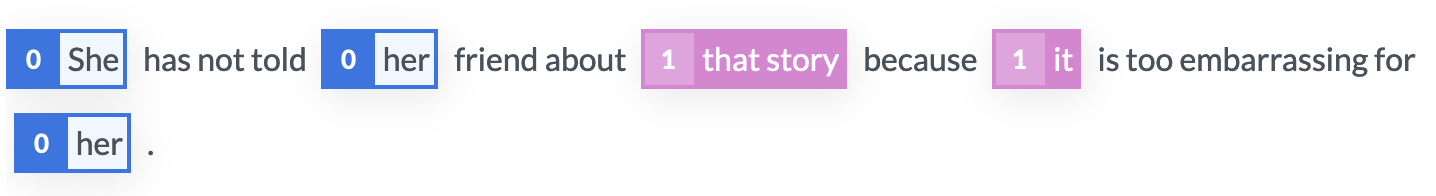

We will now try how well Stanza performs on this task.

❓ Do you consider the references correctly resolved in the following output? Which language model does the default Standard `coref` process use?

--> Coreference Resolution: The chain assigns "She" as the representative of "her" (in "her friend") and "her" at the end, which is correct if they refer to the same person. However, the model links "it" to the entire phrase "told her friend about that story," which is incorrect. "it" should refer specifically to "that story."

--> Default Model: The default coreference model in Stanza´s coref processor is udcoref_xlm-roberta-lora, which uses the XLM-RoBERTa-based model for multilingual coreference resolution.

In [19]:
import stanza
pipeline = stanza.Pipeline("en", processors="tokenize,coref")
example_sentence3 = "She has not told her friend about that story because it is too embarrassing for her."

print(pipeline(example_sentence3))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                  |
----------------------------------------
| tokenize  | combined                 |
| mwt       | combined                 |
| coref     | udcoref_xlm-roberta-lora |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will 

[
  [
    {
      "id": 1,
      "text": "She",
      "start_char": 0,
      "end_char": 3,
      "coref_chains": [
        {
          "index": 0,
          "representative_text": "She",
          "is_start": true,
          "is_end": true,
          "is_representative": true
        }
      ]
    },
    {
      "id": 2,
      "text": "has",
      "start_char": 4,
      "end_char": 7,
      "coref_chains": []
    },
    {
      "id": 3,
      "text": "not",
      "start_char": 8,
      "end_char": 11,
      "coref_chains": []
    },
    {
      "id": 4,
      "text": "told",
      "start_char": 12,
      "end_char": 16,
      "coref_chains": [
        {
          "index": 1,
          "representative_text": "told her friend about that story",
          "is_start": true,
          "is_representative": true
        }
      ]
    },
    {
      "id": 5,
      "text": "her",
      "start_char": 17,
      "end_char": 20,
      "coref_chains": [
        {
          "index": 0,
          "re

👋 ⚒ Adapt one of the [Winograd Schema examples](https://cs.nyu.edu/~davise/papers/WinogradSchemas/WSCollection.html) to see how well Stanza is able to resolve the coreferences.

--> Here, the output suggests the coreference model handled the pronoun "they" correctly in this sentence, linking it to the likely antecedent, i.e. "they" is correctly linked to "The city councilmen." The resolution implies that the city councilmen were the ones who feared violence.

In [20]:
# Your code here:
import stanza
pipeline = stanza.Pipeline("en", processors="tokenize,coref")
example_sentence3 = "The city councilmen refused the demonstrators a permit because they feared violence."

print(pipeline(example_sentence3))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                  |
----------------------------------------
| tokenize  | combined                 |
| mwt       | combined                 |
| coref     | udcoref_xlm-roberta-lora |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will 

[
  [
    {
      "id": 1,
      "text": "The",
      "start_char": 0,
      "end_char": 3,
      "coref_chains": [
        {
          "index": 0,
          "representative_text": "The city councilmen",
          "is_start": true,
          "is_representative": true
        }
      ]
    },
    {
      "id": 2,
      "text": "city",
      "start_char": 4,
      "end_char": 8,
      "coref_chains": [
        {
          "index": 0,
          "representative_text": "The city councilmen",
          "is_representative": true
        }
      ]
    },
    {
      "id": 3,
      "text": "councilmen",
      "start_char": 9,
      "end_char": 19,
      "coref_chains": [
        {
          "index": 0,
          "representative_text": "The city councilmen",
          "is_end": true,
          "is_representative": true
        }
      ]
    },
    {
      "id": 4,
      "text": "refused",
      "start_char": 20,
      "end_char": 27,
      "coref_chains": []
    },
    {
      "id": 5,
      "te

# Bonus Exercise
Compare the performance of Stanza on the Winograd Schema example of your choice to that of the [Coference Resolution plugin](https://github.com/richardpaulhudson/coreferee#getting-started) in spaCy.

In [21]:
!python -m spacy download en_core_web_trf
!python -m spacy download en_core_web_lg
!pip install coreferee
!python -m coreferee install en

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-trf
    Found existing installation: en-core-web-trf 3.7.3
    Uninstalling en-core-web-trf-3.7.3:
      Successfully uninstalled en-core-web-trf-3.7.3
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 787.7 kB/s eta 0:00:00
  Attempting uninstall: en-core-web-lg
    Found existing installation: en-core-web-lg 3.7.1
    Uninstalling en-core-web-lg-3.7.1:
      Successfully uninstalled en-core-web-lg-3.7.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload depe

2024-11-03 12:26:56.520309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-03 12:26:56.545918: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-03 12:26:56.553626: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected

In [25]:
import coreferee, spacy
nlp = spacy.load('en_core_web_trf')
nlp.add_pipe('coreferee')

doc = nlp('Although he was very busy with his work, Peter had had enough of it. He and his wife decided they needed a holiday. They travelled to Spain because they loved the country very much.')
doc._.coref_chains.print()


✘ spaCy model en_core_web_trf version 3.8.0 is not supported by
Coreferee. Please examine /coreferee/lang/en/config.cfg to see the supported
models/versions.


ModelNotSupportedError: spaCy model en_core_web_trf version 3.8.0 is not supported by Coreferee. Please examine /coreferee/lang/en/config.cfg to see the supported models/versions.